# Handwritten Digit Recognition
Dataset Source: https://www.kaggle.com/competitions/digit-recognizer/data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('./data/train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test = pd.read_csv('./data/test.csv')
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utility Function to print 8x8 grid

In [4]:
# Generating 8x8 grid

def grid(idx):
    fig, ax = plt.subplots(8,8)
    fig.set_size_inches(16,9)
    fig.tight_layout()
    for i in range(0,8):
        for j in range(0,8):
            img = np.reshape(np.array((df.iloc[idx])[1:]), (28,28))
            ax[i][j].imshow(img, cmap='grey')
            ax[i][j].axis('off')
            ax[i][j].set_title(df.iloc[idx][0])
            idx += 1

/var/folders/76/8q2f8pb568911qbxyw16cpxw0000gn/T/ipykernel_1281/2497777082.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i][j].set_title(df.iloc[idx][0])


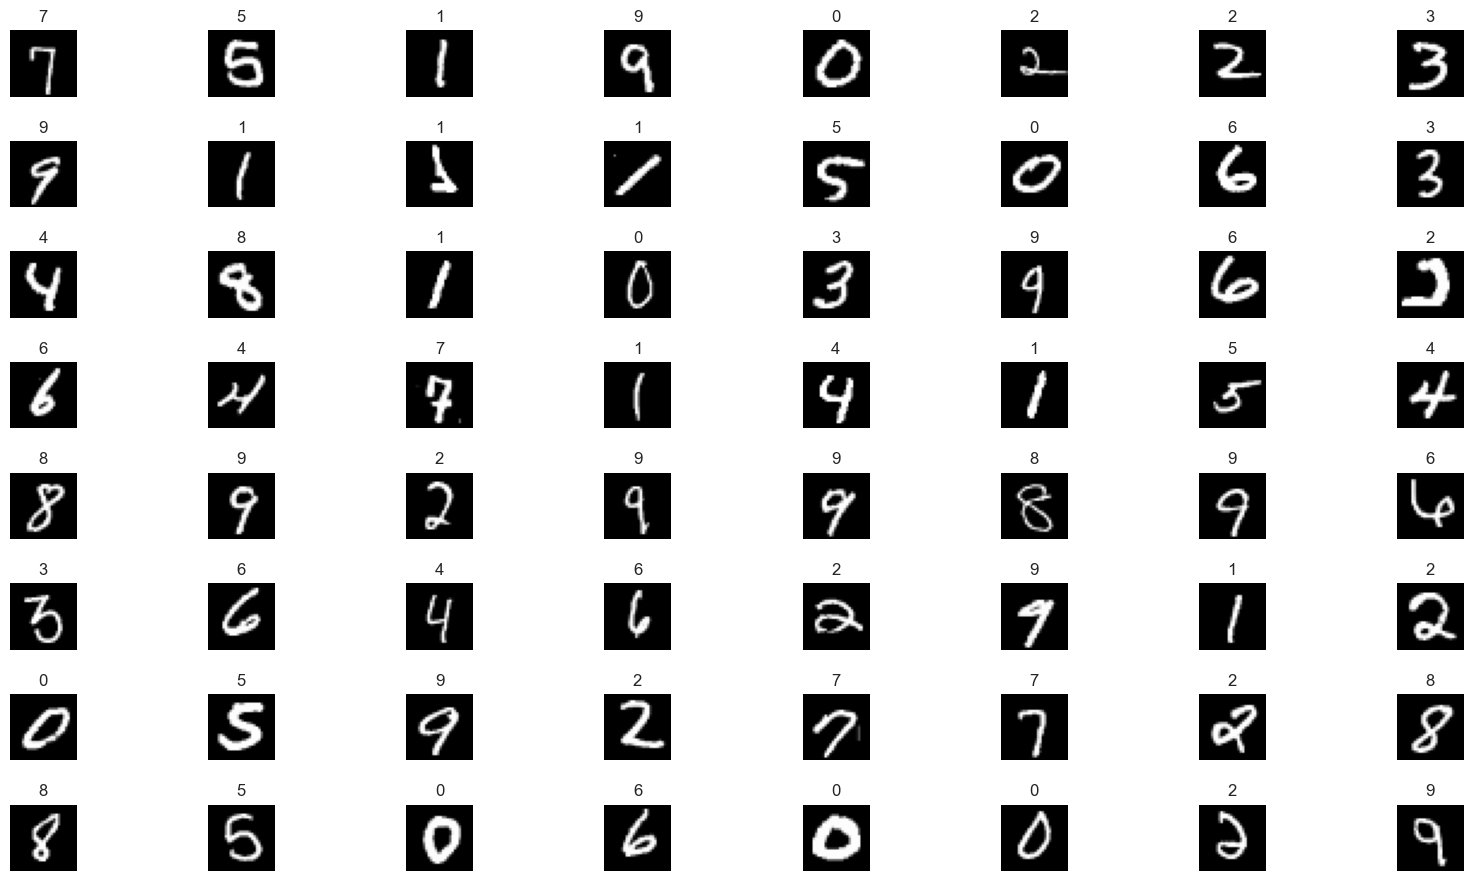

In [117]:
grid(50)

Dataset Cluster Visualization

In [77]:
from sklearn.manifold import TSNE
tsne = TSNE()

X = df.drop('label', axis=1)
y = df['label']
X_tsn = X/255

tsne_res = tsne.fit_transform(X_tsn)

As seen from the clusters, all labels have distinct clusters indicating features unique to the particular label.

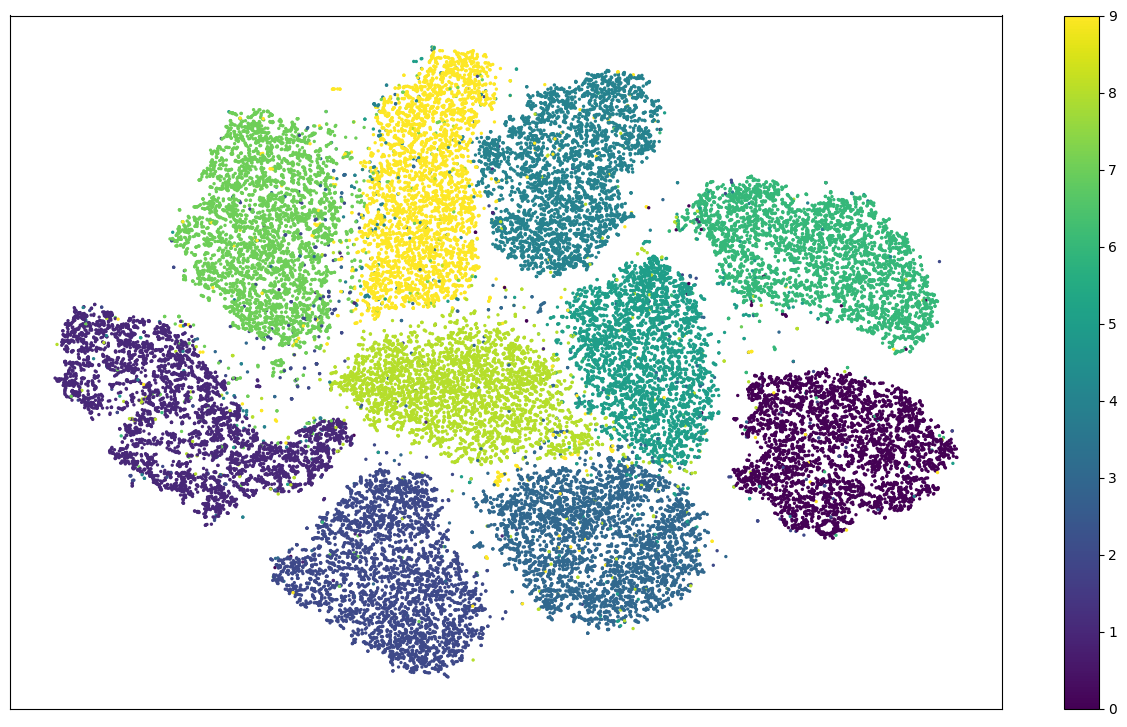

In [78]:
plt.figure(figsize=(16, 9))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

Checking Class Imbalance

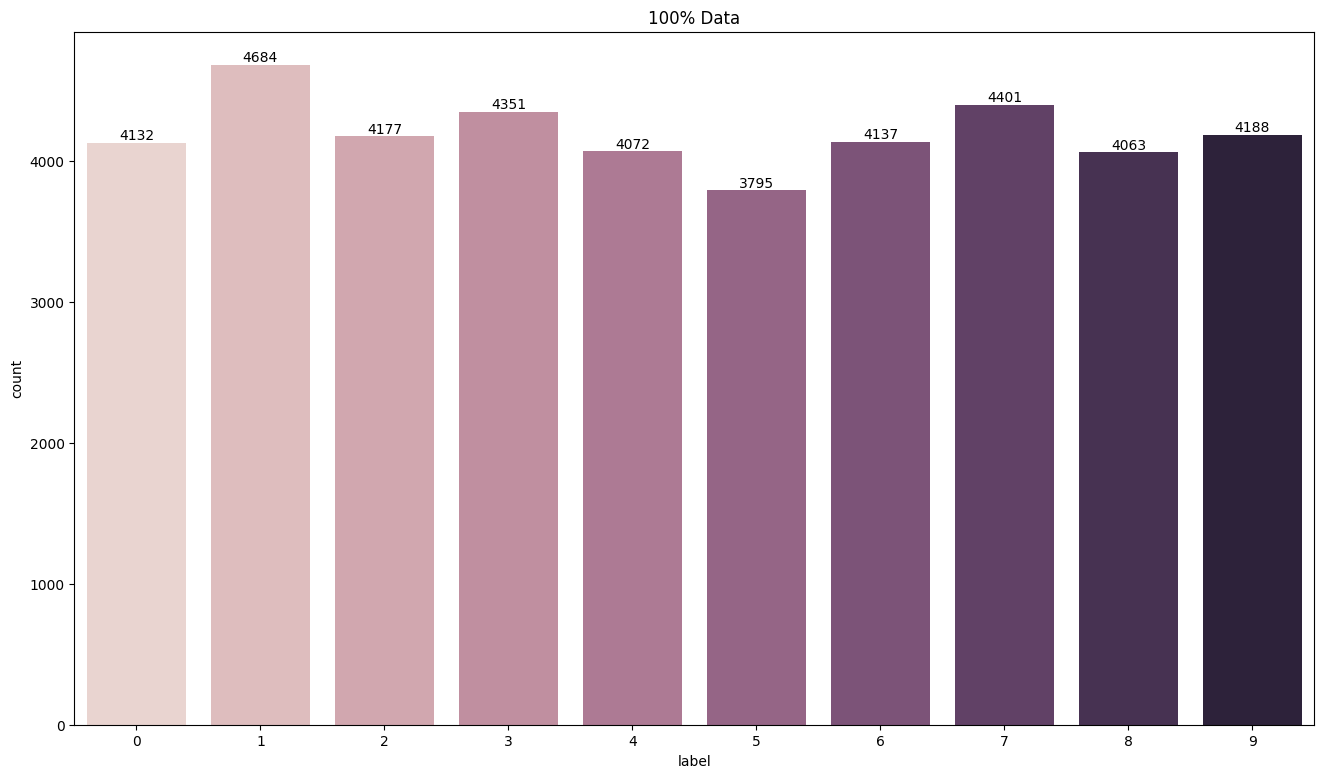

In [7]:
# Slight Imbalance Exists
plt.figure(figsize=(16,9))
plt.title('100% Data')
ax = sns.countplot(df, x='label', hue='label', legend=False)
for i in range(0,10):
    ax.bar_label(ax.containers[i])


## Data Pre-processing

### Establishing a pipeline

This pipeline will be used for the data pre-processing of all models

Normalizing Data (For information only)

In [11]:
from sklearn.preprocessing import StandardScaler
y = df['label']
X = df.drop('label', axis=1)

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


Splitting Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=420)

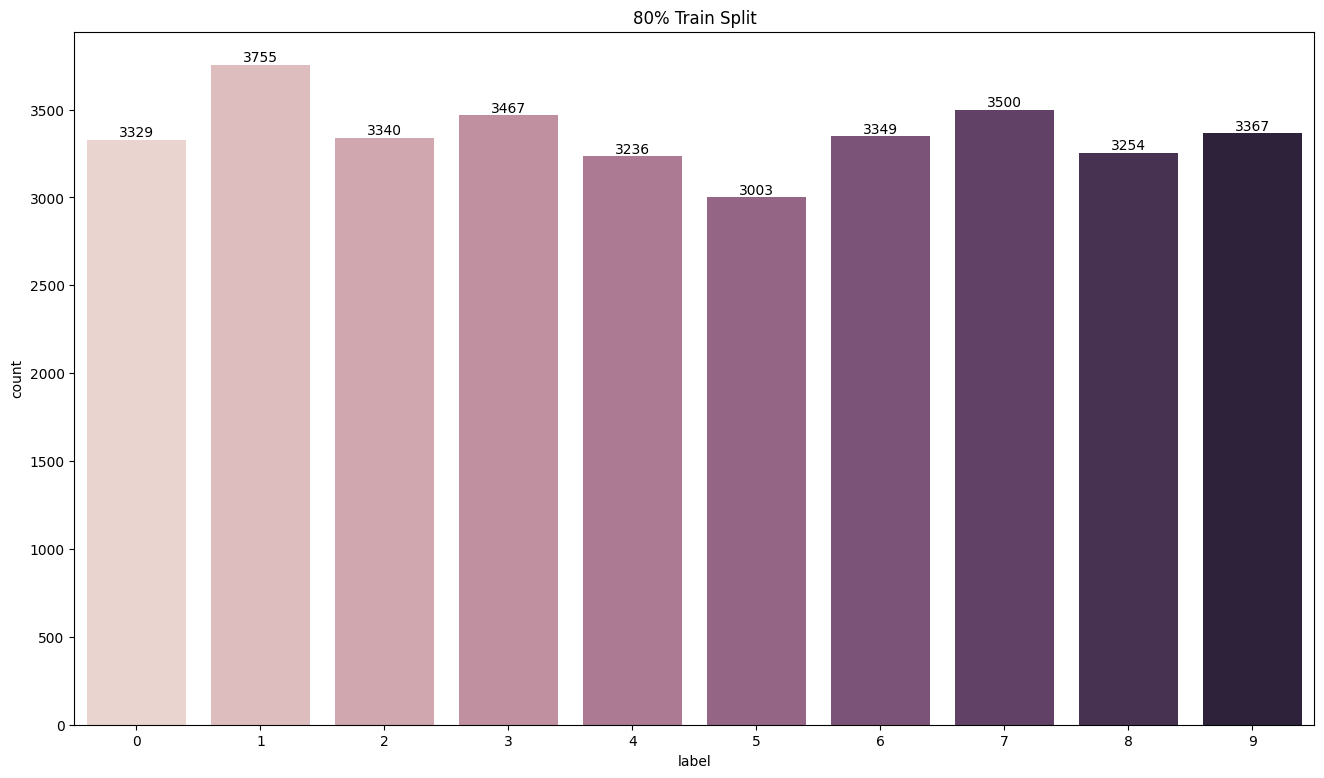

In [14]:
# Distribution after split
plt.figure(figsize=(16,9))
plt.title('80% Train Split')
ax = sns.countplot(pd.DataFrame(y_train), x='label', hue='label', legend=False)
for i in range(0,10):
    ax.bar_label(ax.containers[i])

Making a 20% sample for Computational Feasibility, the sample is a representation of the general population.

Having a small sample allows us to train models quicker, once optimum parameters are found empirically, model can be trained on the full dataset.

In [15]:
X_sample, X_sample_test, y_sample, y_sample_test = train_test_split(X_train, y_train, train_size=0.20)

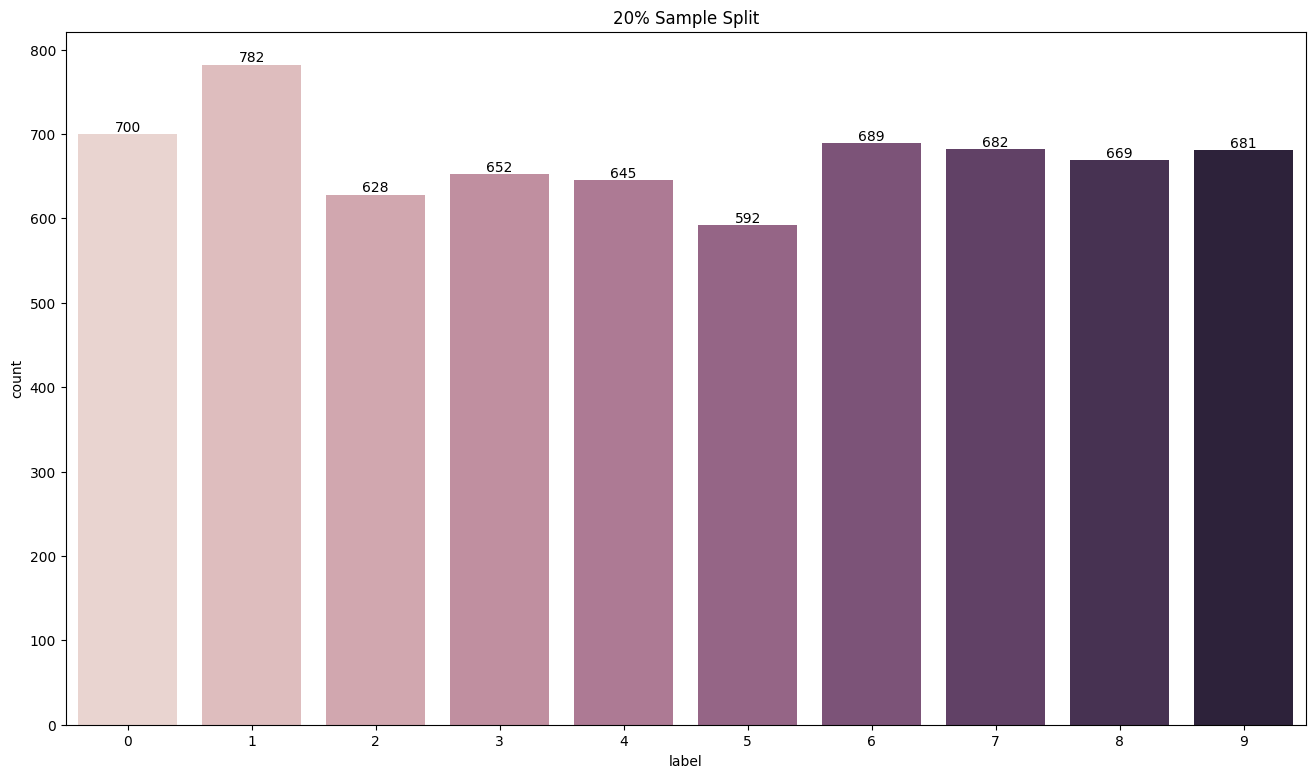

In [16]:
# Distribution after split
plt.figure(figsize=(16,9))
plt.title('20% Sample Split')
ax = sns.countplot(pd.DataFrame(y_sample), x='label', hue='label', legend=False)
for i in range(0,10):
    ax.bar_label(ax.containers[i])

Reviewing quality of sample based on splits

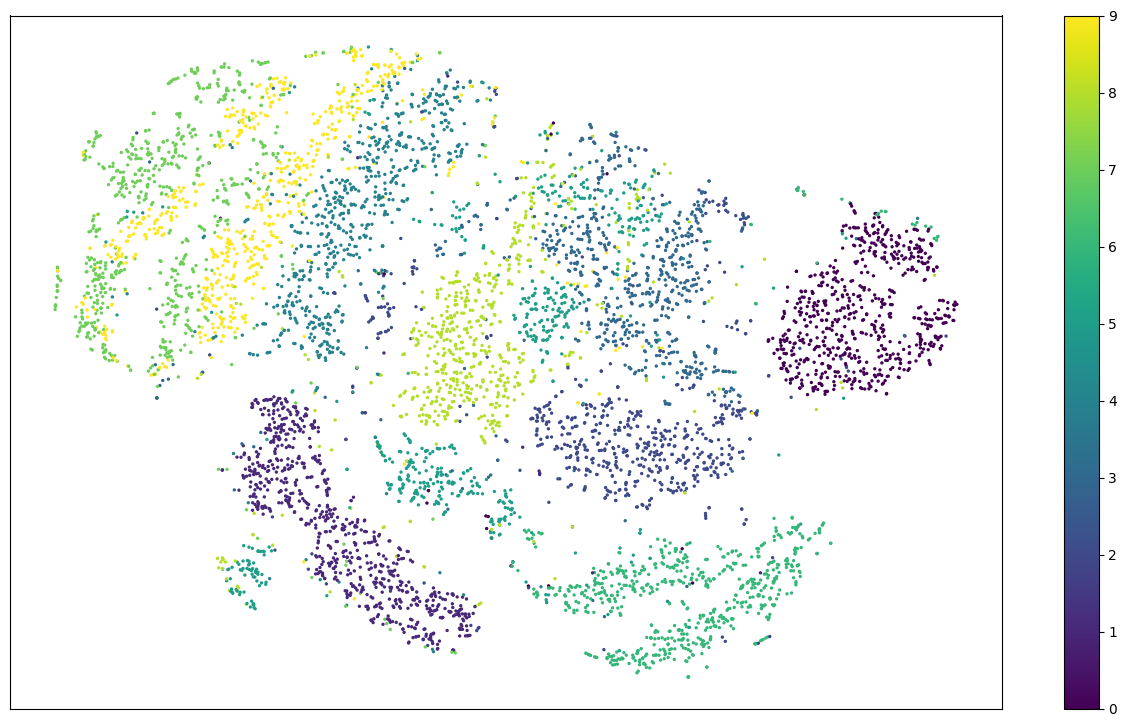

In [115]:
from sklearn.manifold import TSNE
tsne = TSNE()

X_tsn = X_sample/255
y_tsn = y_sample

tsne_res = tsne.fit_transform(X_tsn)

plt.figure(figsize=(16, 9))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y_tsn, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

### End of pipeline

Making normalization functions. I have opted for 3 functions:
* Min-Max - Scales the feature within a range of 0 to 1
* Standard Scaling - Scales the features such that the mean is 0 and the standard deviation is 1. Makes the data normally distributed.
* Img-Norm - 8 bit images have range 0 to 255, similar to min-max scales the values from 0 to 1, however unaffected by feature local min and max

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def normalize(method):
    y = df['label']
    X = df.drop('label', axis=1)
    if method == 'min_max':
        scaler = MinMaxScaler()
        X_norm = scaler.fit_transform(X)
    elif method == 'standard':
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
    elif method == 'img_norm':
        X_norm = X / 255.0
    elif method == 'unnormalized':
        X_norm = X
    
    X_norm = pd.DataFrame(X_norm)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=420)
    X_sample, X_sample_test, y_sample, y_sample_test = train_test_split(X_train, y_train, train_size=0.2)
    
    return X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test

## Algorithms and Performance

Implemented Algorithms

* Logistic Regression
* K-nearest Neigbours
* Decision Tree Classifier
* Support Vector Machine
* Convolutional Neural Network

### Metrics and Utils

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Logistic Regression
#### Choice of solvers
1. Liblinear
    * The solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

2. Saga
    * The SAGA solver is a variant of SAG that also supports the non-smooth penalty L1 option (i.e. L1 Regularization). This is therefore the solver of choice for sparse multinomial logistic regression. It also has a better theoretical convergence compared to SAG.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# LBFGS and SAGA tend to not converge
# Liblinear is also compatible with both penalties
# C value above 0.1 leads to overfit (found exhaustively)

params = {
    'C':[0.001,0.01,0.1, 1.0],
    'multi_class':['ovr'],
    'random_state':[420],
    'solver':['liblinear', 'saga'],
    'penalty':['l1','l2']
}

logistic_model = LogisticRegression()

Normalization: Using Standard Scaling for application of penalties by introducing a negative component.

In [10]:
X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('standard')

In [ ]:
logi_grid = GridSearchCV(logistic_model, param_grid=params, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)
best_logi = logi_grid.fit(X_sample, y_sample)

In [39]:
res = pd.DataFrame(best_logi.cv_results_)
res.to_csv('./models/logistic_grid.csv')

In [40]:
res = pd.read_csv('./models/logistic_grid.csv')
res[['param_C','param_solver', 'param_penalty','mean_test_score', 'mean_train_score']]

,param_C,param_solver,param_penalty,mean_test_score,mean_train_score
0,0.001,liblinear,l1,0.119048,0.119048
1,0.001,saga,l1,0.108185,0.108234
2,0.001,liblinear,l2,0.850744,0.870585
3,0.001,saga,l2,0.862054,0.882341
4,0.010,liblinear,l1,0.829018,0.846776
5,0.010,saga,l1,0.811012,0.825050
6,0.010,liblinear,l2,0.876190,0.919196
7,0.010,saga,l2,0.862649,0.887946
8,0.100,liblinear,l1,0.892857,0.934325
9,0.100,saga,l1,0.861458,0.881895


Parameters of the best model

In [41]:
best_logi.best_estimator_

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', random_state=420,
                   solver='liblinear')

Training the best parameters on full dataset

In [11]:
# logi_params = best_logi.best_params_
logi_params = {'C':0.1, 'multi_class':'ovr', 'penalty':'l1', 'random_state':420, 'solver':'liblinear'}
logistic_final = LogisticRegression(C=logi_params['C'], multi_class=logi_params['multi_class'], penalty=logi_params['penalty'], 
                                    solver=logi_params['solver'], random_state=420)

logistic_final.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', random_state=420,
                   solver='liblinear')

Accuracy to C value plots

<Axes: title={'center': 'Train Accuracy'}, xlabel='param_C', ylabel='mean_train_score'>

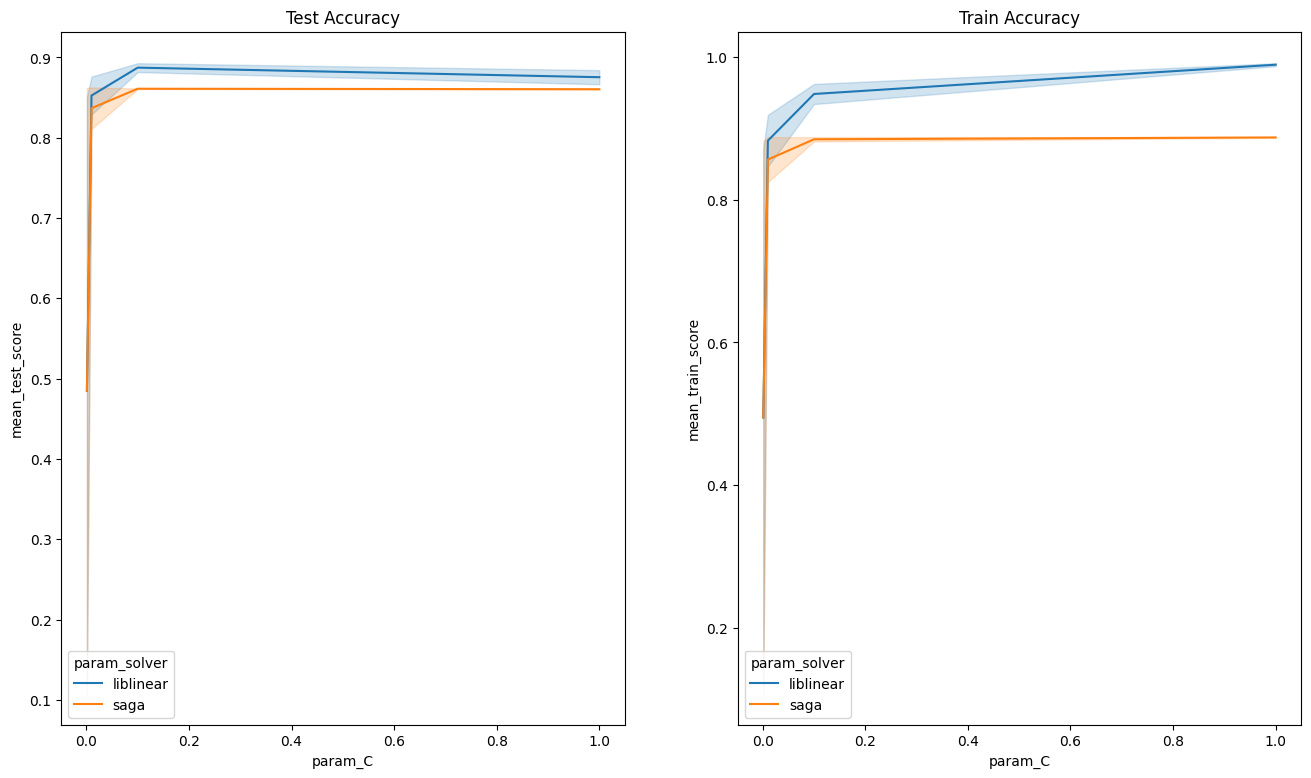

In [78]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,9)
ax[0].set_title('Test Accuracy')
ax[1].set_title('Train Accuracy')
sns.lineplot(data=res, x='param_C', y='mean_test_score', hue='param_solver', ax=ax[0])
sns.lineplot(data=res, x='param_C', y='mean_train_score', hue='param_solver', ax=ax[1])

Logistic Regression Classification Report

There is a misidentification of numbers with similar shape such as 3 and 8, we can see that 3 is just the left half of 8, therefore entries may share similar features and cause model confusion.

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       803
           1       0.95      0.97      0.96       929
           2       0.91      0.90      0.90       837
           3       0.91      0.90      0.90       884
           4       0.92      0.93      0.93       836
           5       0.90      0.89      0.89       792
           6       0.95      0.95      0.95       788
           7       0.93      0.93      0.93       901
           8       0.90      0.87      0.88       809
           9       0.89      0.88      0.89       821

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



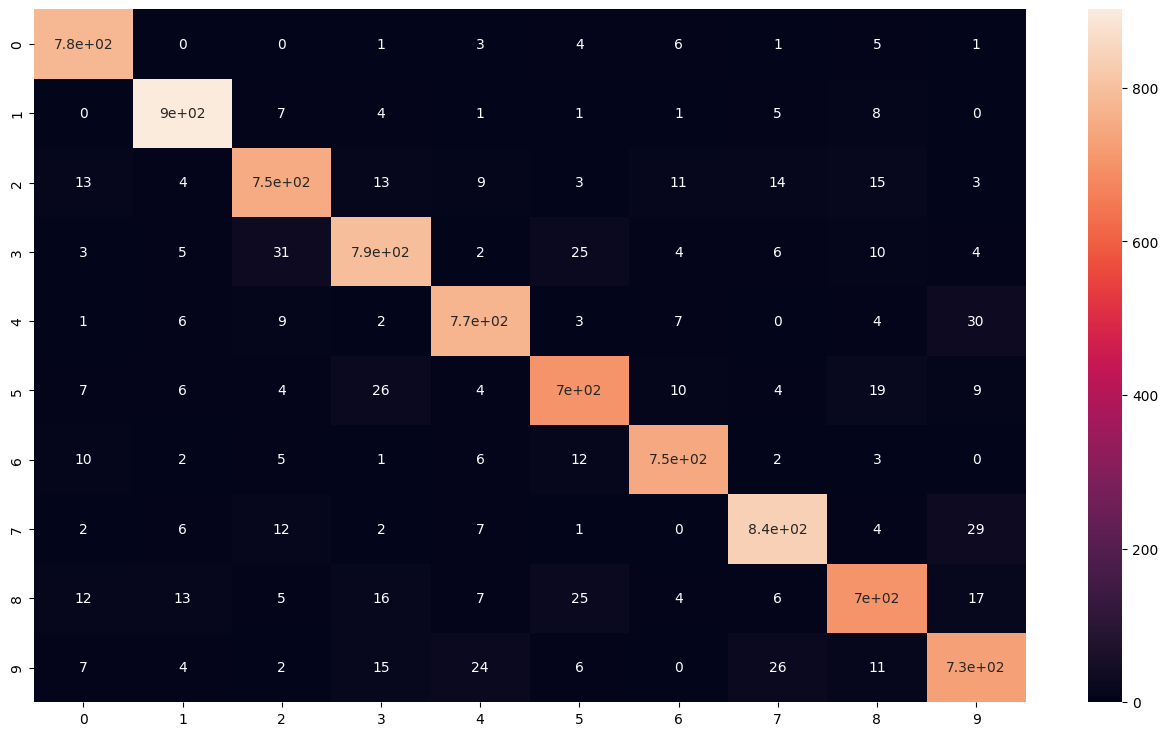

In [93]:
y_hat = logistic_final.predict(X_test)
print(classification_report(y_test, y_hat))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)

Visualizing Logistic Regression Coefficients

Text(0.5, 0.98, 'Coefficients for various classes')

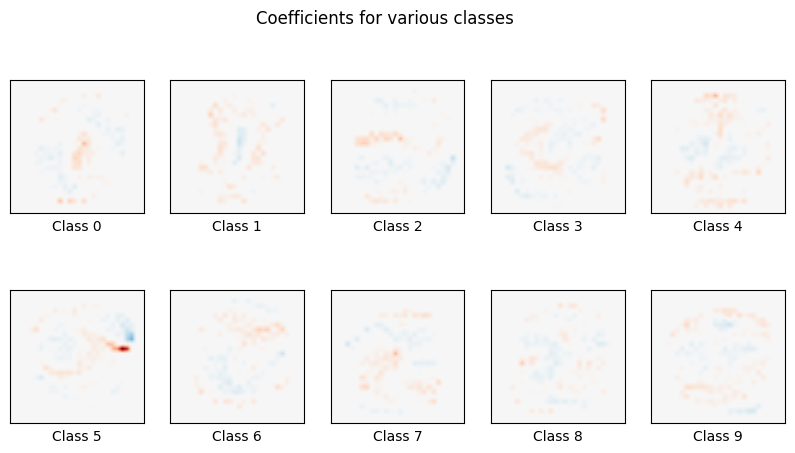

In [28]:
coef = logistic_final.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10):
    coef_plot = plt.subplot(2, 5, i + 1)

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) 
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes')

### Observation and Inference Logistic Regression

Logistic Regression plateaus around 92% accuracy as it does not have the parameter complexity to account for the whole dataset. Whilst Logistic Regression with its **One vs Rest** strategy may be able to classify unique entries, it will often times struggle in confidently predicting the digits which have many similar features for eg: 0, 8, 9 all have similar curves and holes leading to model confusion and poor predictions. 

### K-nearest Neighbours

**Normalization:** Simple scaling values between 0 and 1 by dividing by 255.

**Justification:** The distance magnitudes are preserved while the numerosity is reduced.

In [12]:
X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')
X_sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determining the optimum number of neighbors, this is similar to the elbow method used to determine the optimum number of clusters for unsupervised tasks.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier()
neighbor_list = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn_opt = GridSearchCV(knn_model, param_grid=neighbor_list, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)
knn_opt_model = knn_opt.fit(X_sample, y_sample)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 2/4] END .n_neighbors=2;, score=(train=0.963, test=0.919) total time=   0.6s
[CV 3/4] END .n_neighbors=2;, score=(train=0.963, test=0.921) total time=   0.6s
[CV 3/4] END .n_neighbors=3;, score=(train=0.964, test=0.935) total time=   0.6s
[CV 3/4] END .n_neighbors=1;, score=(train=1.000, test=0.935) total time=   0.6s
[CV 2/4] END .n_neighbors=1;, score=(train=1.000, test=0.936) total time=   0.6s
[CV 2/4] END .n_neighbors=3;, score=(train=0.965, test=0.929) total time=   0.6s
[CV 1/4] END .n_neighbors=3;, score=(train=0.961, test=0.927) total time=   0.6s
[CV 4/4] END .n_neighbors=2;, score=(train=0.965, test=0.914) total time=   0.6s
[CV 4/4] END .n_neighbors=3;, score=(train=0.965, test=0.935) total time=   0.6s
[CV 1/4] END .n_neighbors=1;, score=(train=1.000, test=0.940) total time=   0.6s
[CV 4/4] END .n_neighbors=1;, score=(train=1.000, test=0.930) total time=   0.6s
[CV 1/4] END .n_neighbors=2;, score=(train=0.964

Optimal Neighbors n=3,5

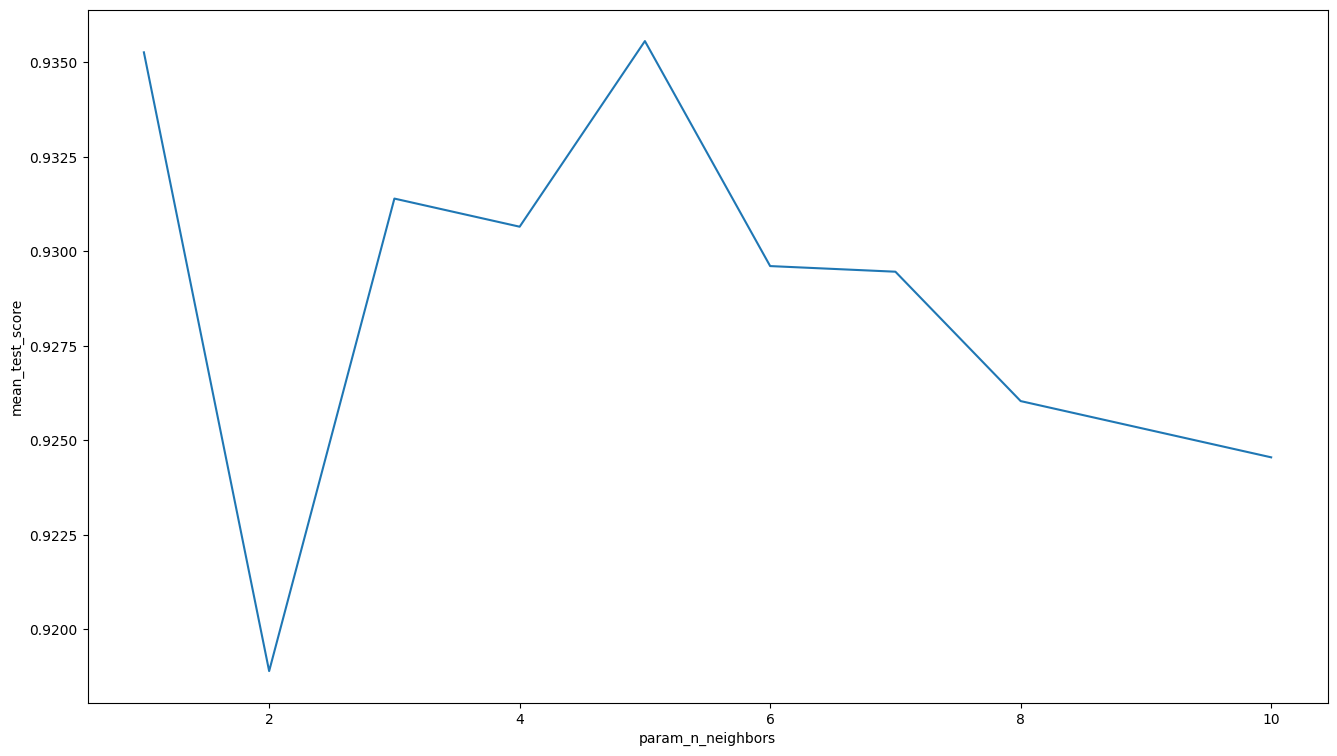

In [42]:
res_knn_opt = pd.DataFrame(knn_opt.cv_results_)
plt.figure(figsize=(16,9))
_ = sns.lineplot(res_knn_opt, x='param_n_neighbors', y='mean_test_score')

Determining the best parameters

In [43]:
params = {
    'n_neighbors': [1,3,5],
    'weights': ['uniform','distance'],
    'algorithm': ['auto'],
    'p':[1,2],
}

knn_grid = GridSearchCV(knn_model, param_grid=params, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)
best_knn = knn_grid.fit(X_sample, y_sample)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END algorithm=auto, n_neighbors=1, p=2, weights=uniform;, score=(train=1.000, test=0.940) total time=   0.6s
[CV 4/4] END algorithm=auto, n_neighbors=1, p=2, weights=uniform;, score=(train=1.000, test=0.930) total time=   0.6s
[CV 3/4] END algorithm=auto, n_neighbors=1, p=2, weights=uniform;, score=(train=1.000, test=0.935) total time=   0.7s
[CV 2/4] END algorithm=auto, n_neighbors=1, p=2, weights=uniform;, score=(train=1.000, test=0.936) total time=   0.6s
[CV 1/4] END algorithm=auto, n_neighbors=1, p=2, weights=distance;, score=(train=1.000, test=0.940) total time=   0.5s
[CV 2/4] END algorithm=auto, n_neighbors=1, p=2, weights=distance;, score=(train=1.000, test=0.936) total time=   0.6s
[CV 4/4] END algorithm=auto, n_neighbors=1, p=2, weights=distance;, score=(train=1.000, test=0.930) total time=   0.6s
[CV 3/4] END algorithm=auto, n_neighbors=1, p=2, weights=distance;, score=(train=1.000, test=0.935) total time

In [44]:
res_knn = pd.DataFrame(best_knn.cv_results_)
res_knn.to_csv('./models/knn_grid.csv')

In [101]:
res_knn = pd.read_csv('./models/knn_grid.csv')
res_knn[['param_n_neighbors','param_weights', 'param_p', 'mean_test_score', 'mean_train_score']]

,param_n_neighbors,param_weights,param_p,mean_test_score,mean_train_score
0,1,uniform,1,0.923363,1.000000
1,1,distance,1,0.923363,1.000000
2,1,uniform,2,0.935268,1.000000
3,1,distance,2,0.935268,1.000000
4,3,uniform,1,0.921429,0.958036
5,3,distance,1,0.925149,1.000000
6,3,uniform,2,0.931399,0.963839
7,3,distance,2,0.934375,1.000000
8,5,uniform,1,0.919048,0.946032
9,5,distance,1,0.924256,1.000000


Model with Best Parameters

In [46]:
best_knn.best_estimator_

KNeighborsClassifier(weights='distance')

Training Best KNN on Full Dataset

In [47]:
knn_params = best_knn.best_params_
knn_params

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [14]:
knn_params = {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
knn_final = KNeighborsClassifier(algorithm=knn_params['algorithm'],n_neighbors=knn_params['n_neighbors'], p=knn_params['p'], weights=knn_params['weights'])

knn_final.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

KNN Classification Report

The KNN algorithm has a desireable accuracy of 97%. The reason for such accuracy is due to the good generalization present in the dataset. As seen in the EDA part, each label has its own well formed clusters and since KNN also represents data in a multi-dimensional plane and makes estimation based on its neighbours, the only predictions it will make incorrect are the datapoints present in the incorrect clusters due to their unique properties. Such datapoints can also be seen as outliers or anomalies

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       803
           1       0.96      1.00      0.98       929
           2       0.98      0.96      0.97       837
           3       0.96      0.98      0.97       884
           4       0.99      0.95      0.97       836
           5       0.97      0.96      0.96       792
           6       0.98      0.98      0.98       788
           7       0.96      0.98      0.97       901
           8       0.99      0.94      0.96       809
           9       0.94      0.96      0.95       821

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



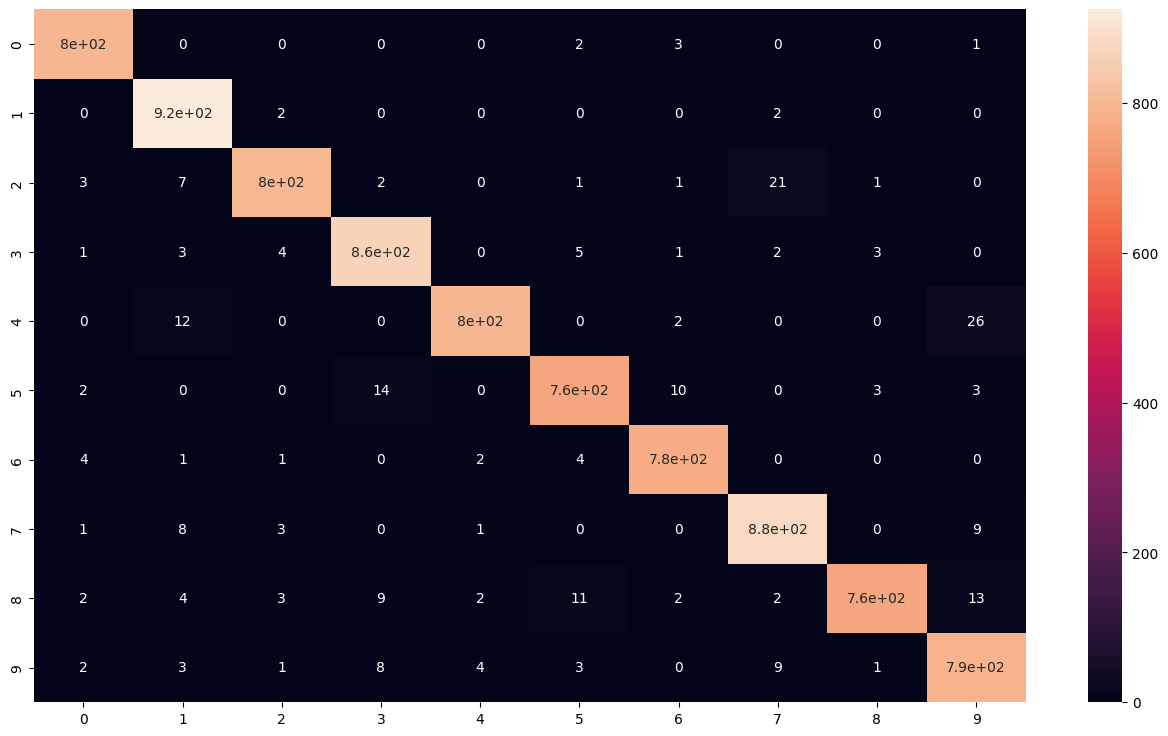

In [103]:
y_hat = knn_final.predict(X_test)
print(classification_report(y_test, y_hat))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)

### Observation and Inference KNN

The KNN algorithm is a distance based algorithm which estimates the data label based on its N nearest neighbours. Since the MNIST dataset has many entries with features that generally represent a particular label, there is a high probability that an unknown entry may have features similar to its label and may get placed among its neighbours of the same class. This gives excellent accuracy on the absolute points, however KNN fails to correctly classify those points which are anomalies and may not represent the general features of the particular label.

### Decision Tree Classifier

By inference on unparametered tree, overfits to 100% at depth 24

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

depths = np.arange(3, 25)

params = {
    'max_depth':depths,
    'random_state':[420]
}

dtc_model = DecisionTreeClassifier()

Normalization: Image normalization by 255, this reduces numerosity whilst preserving the entropy scale.

In [105]:
X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')

Finding optimum depth

In [52]:
opt_depth = GridSearchCV(dtc_model, param_grid=params, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)

opt_depth.fit(X_sample, y_sample)

Fitting 4 folds for each of 22 candidates, totalling 88 fits
[CV 3/4] END max_depth=3, random_state=420;, score=(train=0.499, test=0.484) total time=   0.2s
[CV 2/4] END max_depth=3, random_state=420;, score=(train=0.514, test=0.504) total time=   0.2s
[CV 4/4] END max_depth=3, random_state=420;, score=(train=0.518, test=0.512) total time=   0.2s
[CV 1/4] END max_depth=3, random_state=420;, score=(train=0.458, test=0.450) total time=   0.2s
[CV 1/4] END max_depth=4, random_state=420;, score=(train=0.641, test=0.624) total time=   0.2s
[CV 2/4] END max_depth=4, random_state=420;, score=(train=0.635, test=0.624) total time=   0.3s
[CV 4/4] END max_depth=4, random_state=420;, score=(train=0.634, test=0.635) total time=   0.3s
[CV 3/4] END max_depth=4, random_state=420;, score=(train=0.624, test=0.606) total time=   0.3s
[CV 1/4] END max_depth=5, random_state=420;, score=(train=0.698, test=0.652) total time=   0.3s
[CV 2/4] END max_depth=5, random_state=420;, score=(train=0.715, test=0.680

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                         'random_state': [420]},
             return_train_score=True, verbose=3)

Plotting Accuracies to Depth

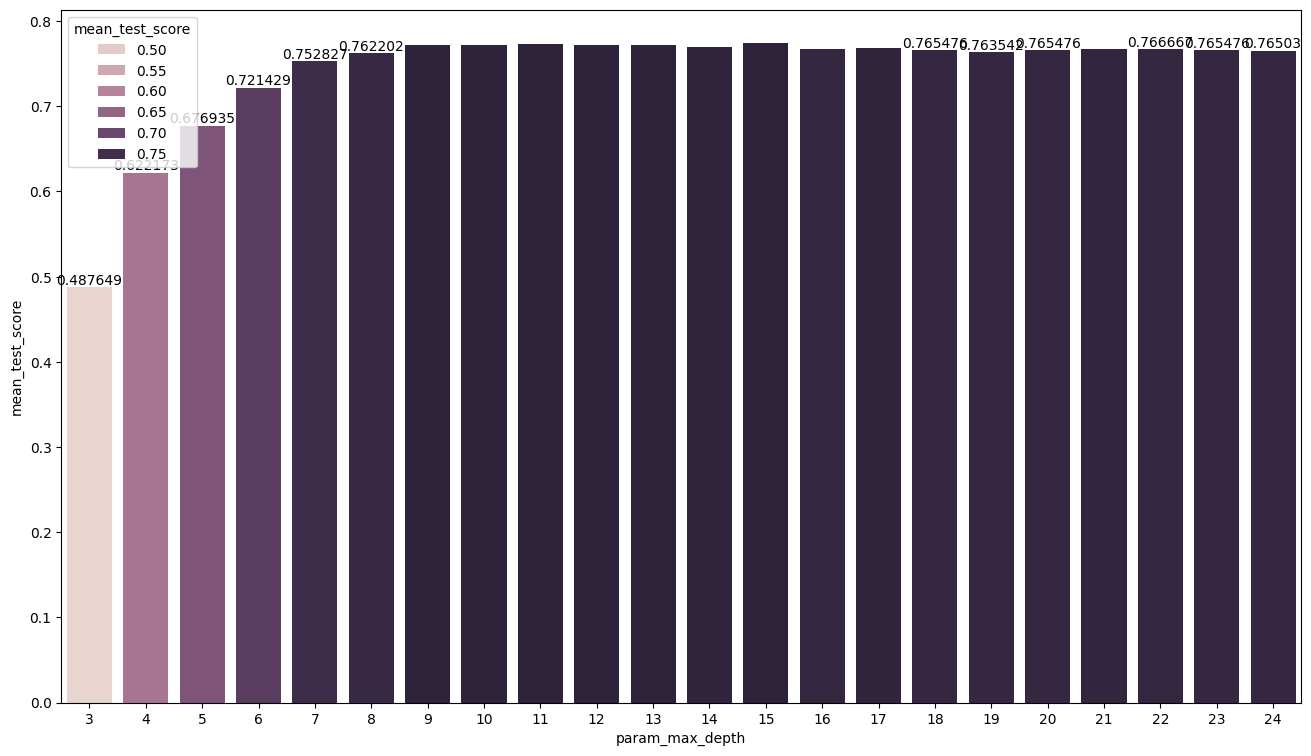

In [53]:
res_dct_opt = pd.DataFrame(opt_depth.cv_results_)
plt.figure(figsize=(16,9))
_ = sns.barplot(res_dct_opt, x='param_max_depth', y='mean_test_score', hue='mean_test_score')

for i in range(0,10):
    _.bar_label(_.containers[i])

In [54]:
opt_depth.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=420)

Finding the best criterion parameter

In [55]:
params = {
    'max_depth':[10,15,22],
    'criterion':['entropy','gini','log_loss'],
    'random_state':[420]
}

dtc_grid = GridSearchCV(dtc_model, param_grid=params, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)
best_dtc = dtc_grid.fit(X_sample, y_sample)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV 2/4] END criterion=entropy, max_depth=10, random_state=420;, score=(train=0.978, test=0.792) total time=   0.7s
[CV 1/4] END criterion=entropy, max_depth=10, random_state=420;, score=(train=0.979, test=0.785) total time=   0.8s
[CV 4/4] END criterion=entropy, max_depth=15, random_state=420;, score=(train=1.000, test=0.800) total time=   0.8s
[CV 3/4] END criterion=entropy, max_depth=10, random_state=420;, score=(train=0.980, test=0.784) total time=   0.8s
[CV 4/4] END criterion=entropy, max_depth=10, random_state=420;, score=(train=0.983, test=0.804) total time=   0.8s
[CV 1/4] END criterion=entropy, max_depth=15, random_state=420;, score=(train=1.000, test=0.777) total time=   0.8s
[CV 1/4] END criterion=entropy, max_depth=22, random_state=420;, score=(train=1.000, test=0.777) total time=   0.8s
[CV 3/4] END criterion=entropy, max_depth=22, random_state=420;, score=(train=1.000, test=0.782) total time=   0.8s
[CV 2/4] END

In [56]:
dtc_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=420)

In [57]:
res_dtc = pd.DataFrame(best_dtc.cv_results_)
res_dtc.to_csv('./models/decision_tree.csv')

In [106]:
res_dtc = pd.read_csv('./models/decision_tree.csv')
res_dtc[['param_criterion', 'param_max_depth', 'mean_test_score']]

,param_criterion,param_max_depth,mean_test_score
0,entropy,10,0.791220
1,entropy,15,0.787202
2,entropy,22,0.787202
3,gini,10,0.771429
4,gini,15,0.774702
5,gini,22,0.766667
6,log_loss,10,0.791220
7,log_loss,15,0.787202
8,log_loss,22,0.787202


Plotting the accuracy per criterion

<Axes: title={'center': 'Train Accuracy'}, xlabel='param_max_depth', ylabel='mean_train_score'>

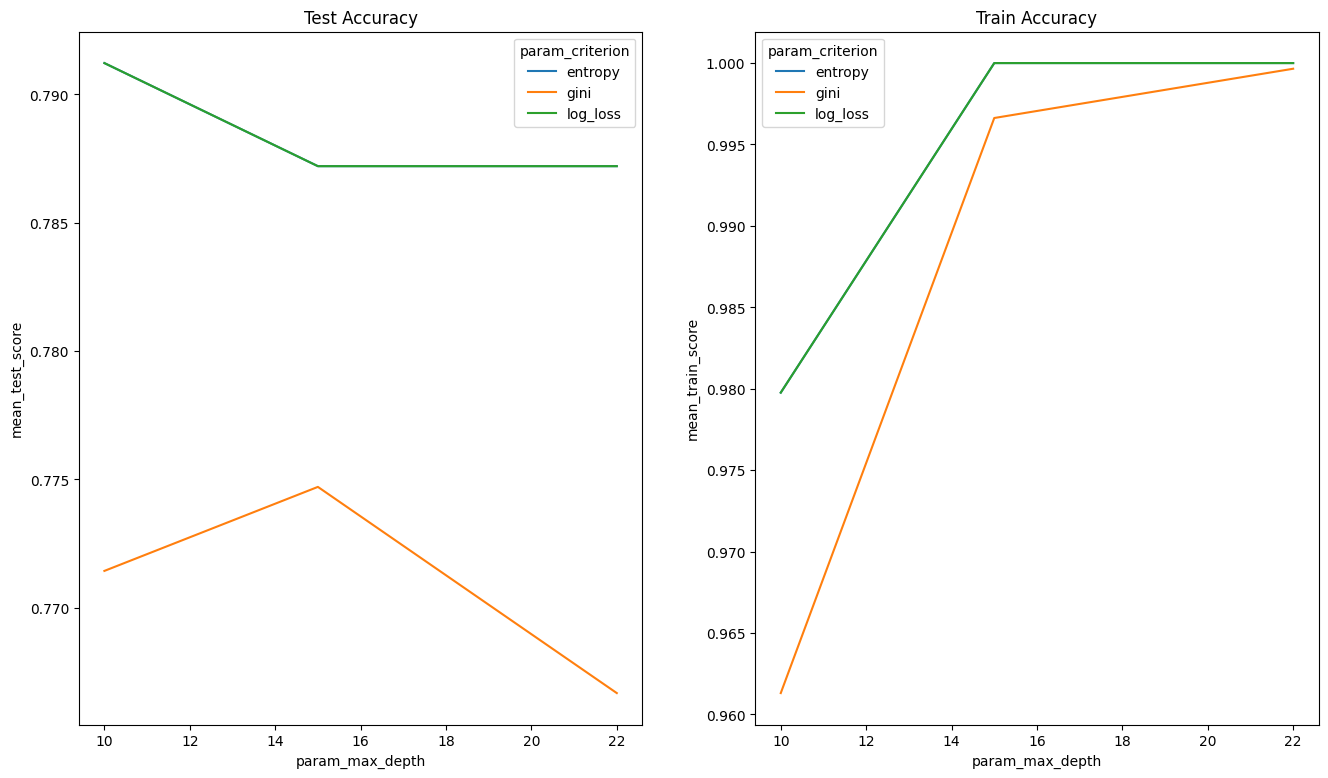

In [59]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,9)
ax[0].set_title('Test Accuracy')
ax[1].set_title('Train Accuracy')
sns.lineplot(data=res_dtc, x='param_max_depth', y='mean_test_score', hue='param_criterion', ax=ax[0])
sns.lineplot(data=res_dtc, x='param_max_depth', y='mean_train_score', hue='param_criterion', ax=ax[1])

Training the tree with Best Parameters

In [16]:
dtc_params = {'criterion':'entropy', 'max_depth':10}
dtc_final = DecisionTreeClassifier(max_depth=dtc_params['max_depth'], criterion=dtc_params['criterion'])

dtc_final.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [110]:
dtc_final.score(X_test, y_test)

0.8621428571428571

Final Best Tree Plot

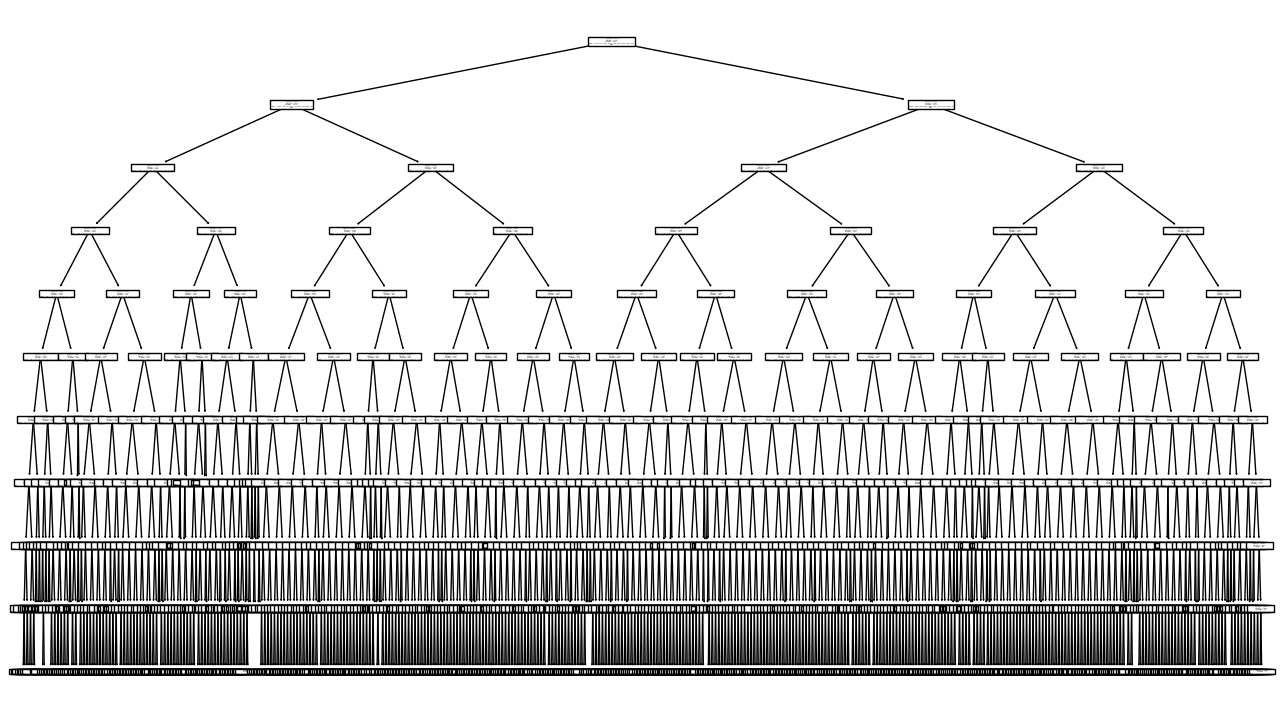

In [62]:
plt.figure(figsize=(16,9))
_ = tree.plot_tree(dtc_final)

Decison Tree Classification Report

Yields very poor results due to data sparsity and feature sharing.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       803
           1       0.95      0.95      0.95       929
           2       0.85      0.85      0.85       837
           3       0.84      0.82      0.83       884
           4       0.84      0.84      0.84       836
           5       0.83      0.80      0.81       792
           6       0.87      0.86      0.86       788
           7       0.90      0.91      0.90       901
           8       0.83      0.83      0.83       809
           9       0.79      0.84      0.81       821

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



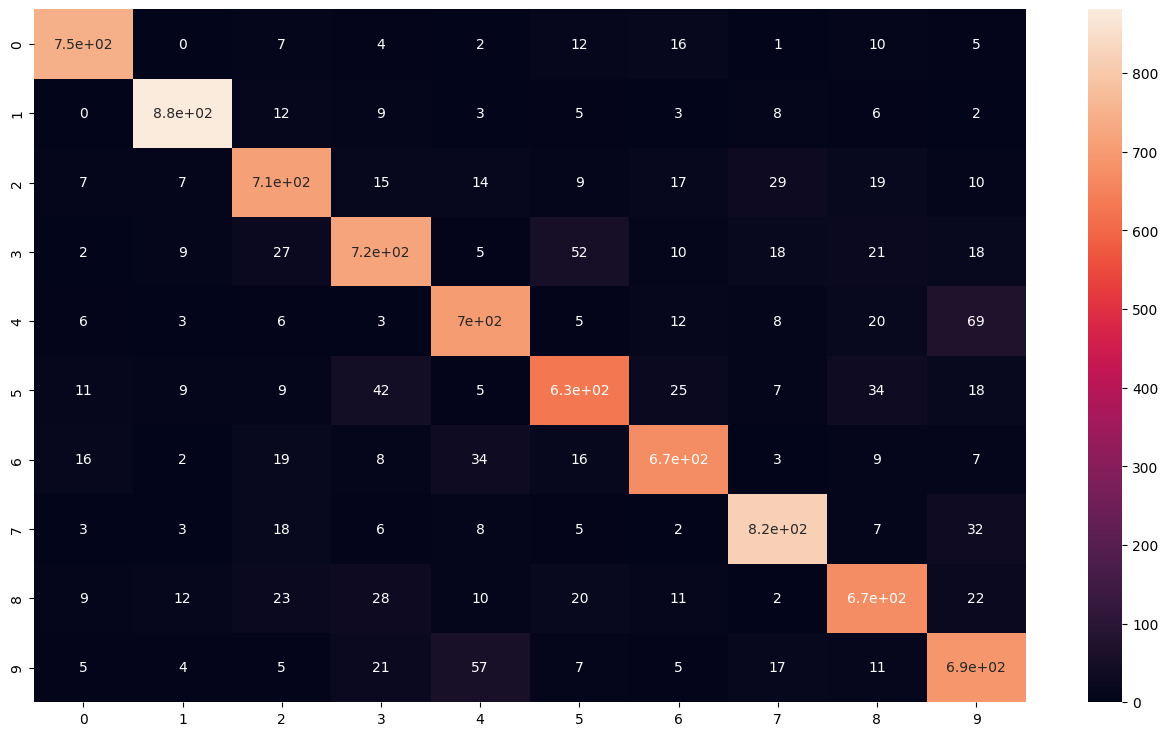

In [64]:
y_hat = dtc_final.predict(X_test)
print(classification_report(y_test, y_hat))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)

### Observation and Inference Decision Tree Classifier

The Decision Tree Classifier yields a flow chart like tree which produces predictions based on conditional nodes and branches of the trees leading to a leaf node. The sparsity of the dataset as well as the feature similarites shared across labels means that the decision tree will not be able to produce pure splits with a zero entropy. This yields a poorly classifying model incapable of confidently predicting the correct label. The performance can be increased by performing t-SNE or TSVD where only the most important features representing each label are kept. This will reduce the ambiguity within the dataset and allow a generelized tree to be developed.

### Support Vector Machine

Data Normalization

Using Image Normalization

In [111]:
X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')
X_sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Optimizing SVM Parameters Empirically

In [17]:
from sklearn.svm import SVC

In [67]:
svc_model = SVC()

params = {
    'kernel':['linear','rbf'],
    'gamma':['scale', 1e-2, 1],
    'C':[0.1, 1.0, 10, 15],
    'random_state':[420]
}

svc_grid = GridSearchCV(svc_model, param_grid=params, cv=4, refit=True, verbose=3, n_jobs=-1, return_train_score=True)

svc_grid.fit(X_sample, y_sample)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 3/4] END C=0.1, gamma=0.01, kernel=linear, random_state=420;, score=(train=0.980, test=0.912) total time=   7.8s
[CV 3/4] END C=0.1, gamma=scale, kernel=linear, random_state=420;, score=(train=0.980, test=0.912) total time=   8.1s
[CV 4/4] END C=0.1, gamma=scale, kernel=linear, random_state=420;, score=(train=0.978, test=0.914) total time=   8.1s
[CV 2/4] END C=0.1, gamma=0.01, kernel=linear, random_state=420;, score=(train=0.979, test=0.921) total time=   8.1s
[CV 1/4] END C=0.1, gamma=scale, kernel=linear, random_state=420;, score=(train=0.978, test=0.917) total time=   8.2s
[CV 4/4] END C=0.1, gamma=0.01, kernel=linear, random_state=420;, score=(train=0.978, test=0.914) total time=   8.1s
[CV 1/4] END C=0.1, gamma=0.01, kernel=linear, random_state=420;, score=(train=0.978, test=0.917) total time=   8.3s
[CV 2/4] END C=0.1, gamma=scale, kernel=linear, random_state=420;, score=(train=0.979, test=0.921) total time=   8.2s

GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10, 15], 'gamma': ['scale', 0.01, 1],
                         'kernel': ['linear', 'rbf'], 'random_state': [420]},
             return_train_score=True, verbose=3)

Parameters of best model

In [68]:
svc_grid.best_estimator_

SVC(C=10, random_state=420)

In [69]:
res_svc = pd.DataFrame(svc_grid.cv_results_)
res_svc.to_csv('./models/svc_grid.csv')

In [113]:
res_svc = pd.read_csv('./models/svc_grid.csv')
res_svc[['param_kernel','param_gamma', 'param_C', 'mean_test_score', 'mean_train_score']]

,param_kernel,param_gamma,param_C,mean_test_score,mean_train_score
0,linear,scale,0.1,0.915923,0.978621
1,rbf,scale,0.1,0.909077,0.924157
2,linear,0.01,0.1,0.915923,0.978621
3,rbf,0.01,0.1,0.902976,0.916518
4,linear,1,0.1,0.915923,0.978621
5,rbf,1,0.1,0.114286,0.114286
6,linear,scale,1.0,0.904613,0.999554
7,rbf,scale,1.0,0.949851,0.982837
8,linear,0.01,1.0,0.904613,0.999554
9,rbf,0.01,1.0,0.944048,0.974702


Plotting Accuracy to C

<Axes: title={'center': 'Train Accuracy'}, xlabel='param_C', ylabel='mean_train_score'>

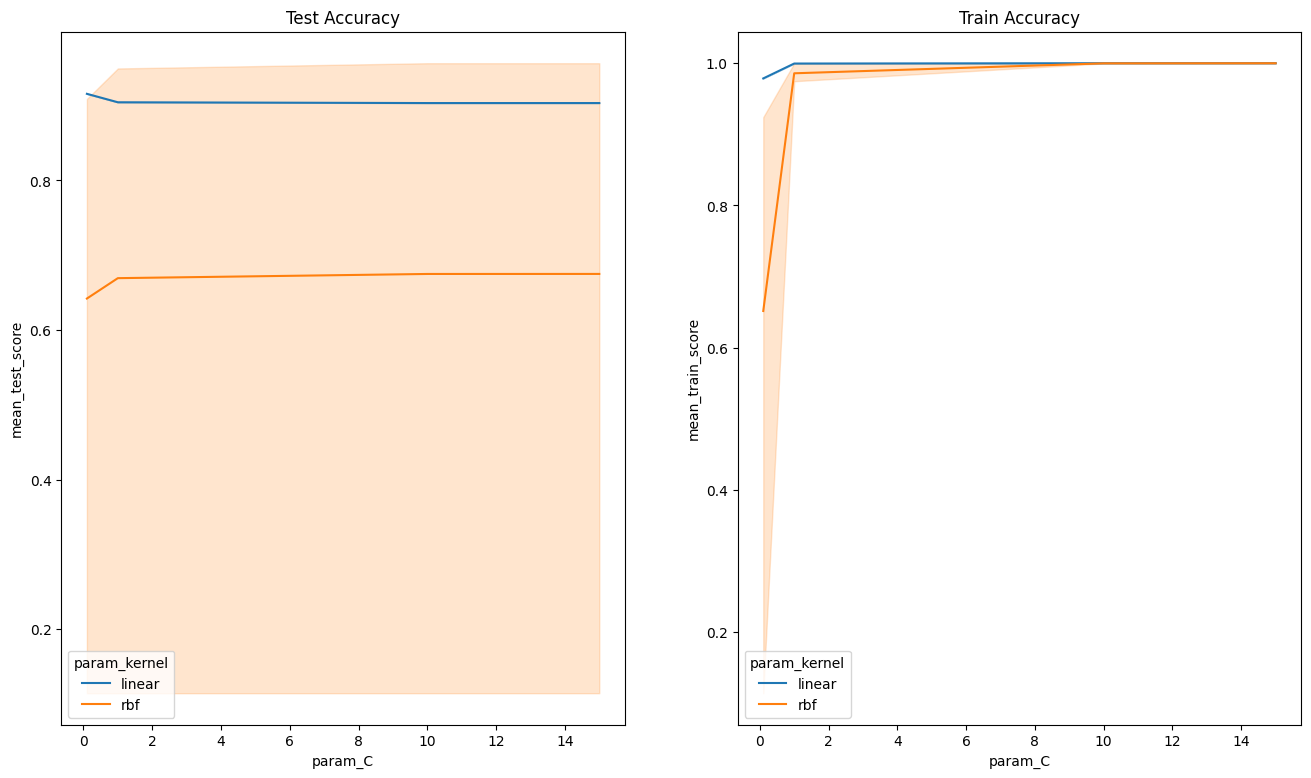

In [71]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,9)
ax[0].set_title('Test Accuracy')
ax[1].set_title('Train Accuracy')
sns.lineplot(data=res_svc, x='param_C', y='mean_test_score', hue='param_kernel', ax=ax[0])
sns.lineplot(data=res_svc, x='param_C', y='mean_train_score', hue='param_kernel', ax=ax[1])

Plotting Accuracy to Gamma

<Axes: title={'center': 'Train Accuracy'}, xlabel='param_gamma', ylabel='mean_train_score'>

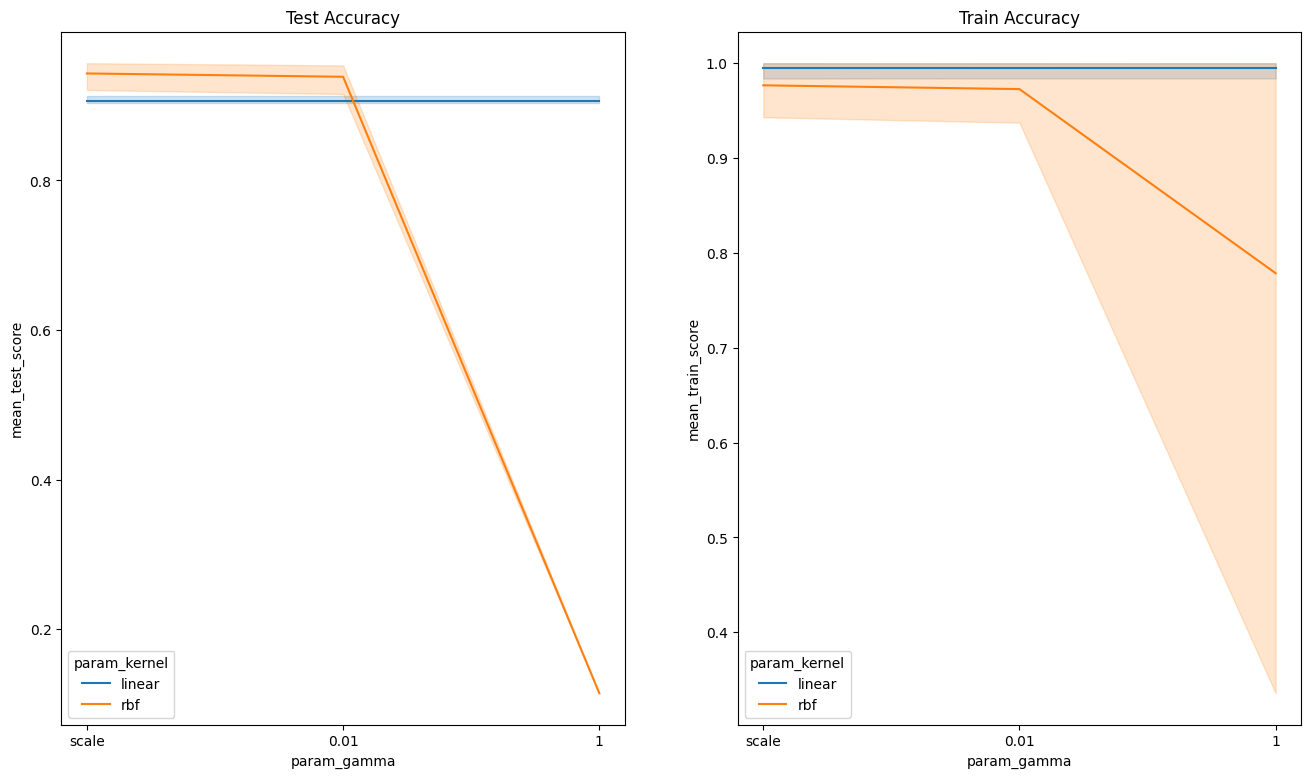

In [72]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,9)
ax[0].set_title('Test Accuracy')
ax[1].set_title('Train Accuracy')
sns.lineplot(data=res_svc, x='param_gamma', y='mean_test_score', hue='param_kernel', ax=ax[0])
sns.lineplot(data=res_svc, x='param_gamma', y='mean_train_score', hue='param_kernel', ax=ax[1])

Training best parameters of full dataset

In [18]:
svc_params = {'C':10, 'random_state':420}
svc_final = SVC(C=svc_params['C'], random_state=420)

svc_final.fit(X_train, y_train)

SVC(C=10, random_state=420)

SVM Classification Report

SVM is capable of getting a 98% accuracy due to its complexity. The model represents the high dimensional data in a multi-dimensional form and uses hyperplanes in order to seperate the points within their categories. The hyperplanes can exhibit complex shapes and functions. This allows complete seperation of the data into its respective labels.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       803
           1       0.99      0.99      0.99       929
           2       0.98      0.98      0.98       837
           3       0.98      0.98      0.98       884
           4       0.98      0.97      0.98       836
           5       0.98      0.98      0.98       792
           6       0.99      0.98      0.99       788
           7       0.98      0.98      0.98       901
           8       0.98      0.98      0.98       809
           9       0.97      0.97      0.97       821

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



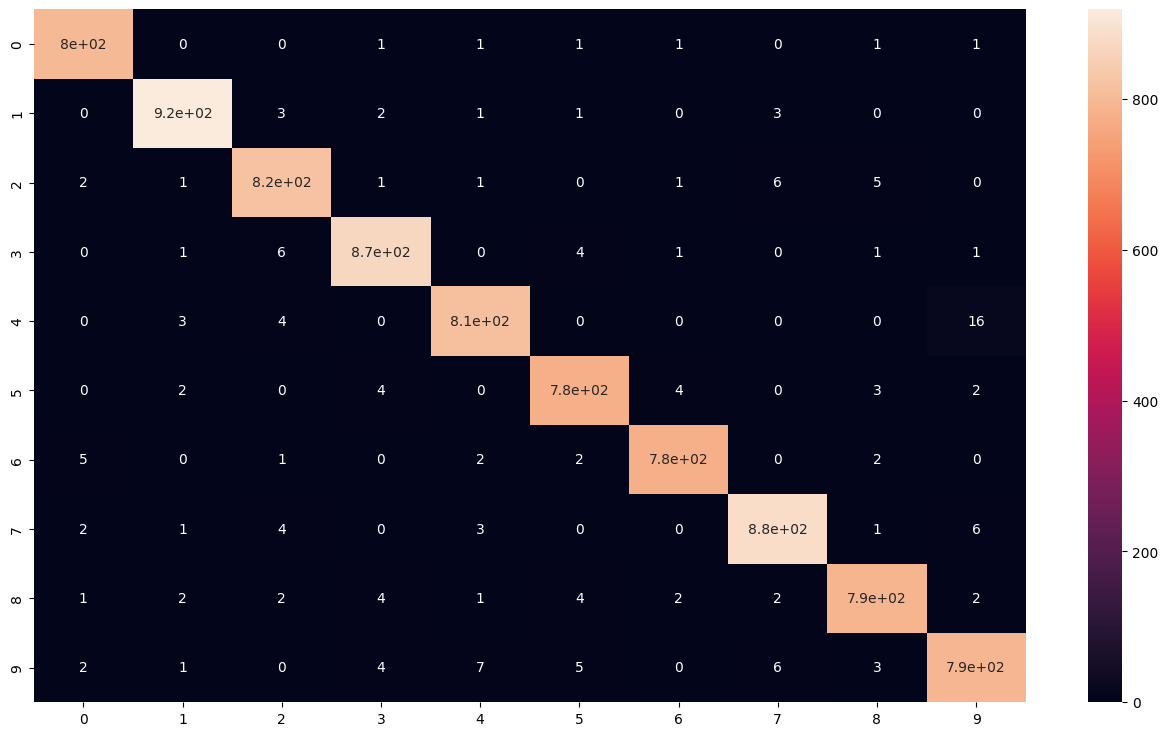

In [75]:
y_hat = svc_final.predict(X_test)
print(classification_report(y_test, y_hat))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)

In [115]:
svc_final.score(X_test, y_test)

0.9807142857142858

### Observation and Support Vector Machine

The SVM algorithm provides a highly desireable accuracy of 98%. This is due to its complexity and the ability to split complex data into labels using hyperplanes. The SVM algorithm represents the datset into a multi-dimensional space and uses hyperplanes which a seperating planes that can exhibit a functional shape useful for splitting the data into respective labels. The hyperplane is formed on the basis of the support vectors which are basically points that share similar features to multiple labels due to which the datapoint is difficult to classify. By applying the principle of maximizing the support vector distance, optimum planes are found for accurate classification of the dataset.

### Convolutional Neural Network

#### Defining a model from scratch

I am using the tensorflow library as it has an abstraction utility called Keras which greatly simplifies the model building process.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

Defining Model Architecture

This is a simple CNN architecture, it follows the basic principles of a CNN by performing convolutions and pooling for feature extraction. There are no fancy concepts such as dropouts or batch normalization used for this implementation as the aim is to demonstrate the performance of a Vanilla CNN on the dataset.

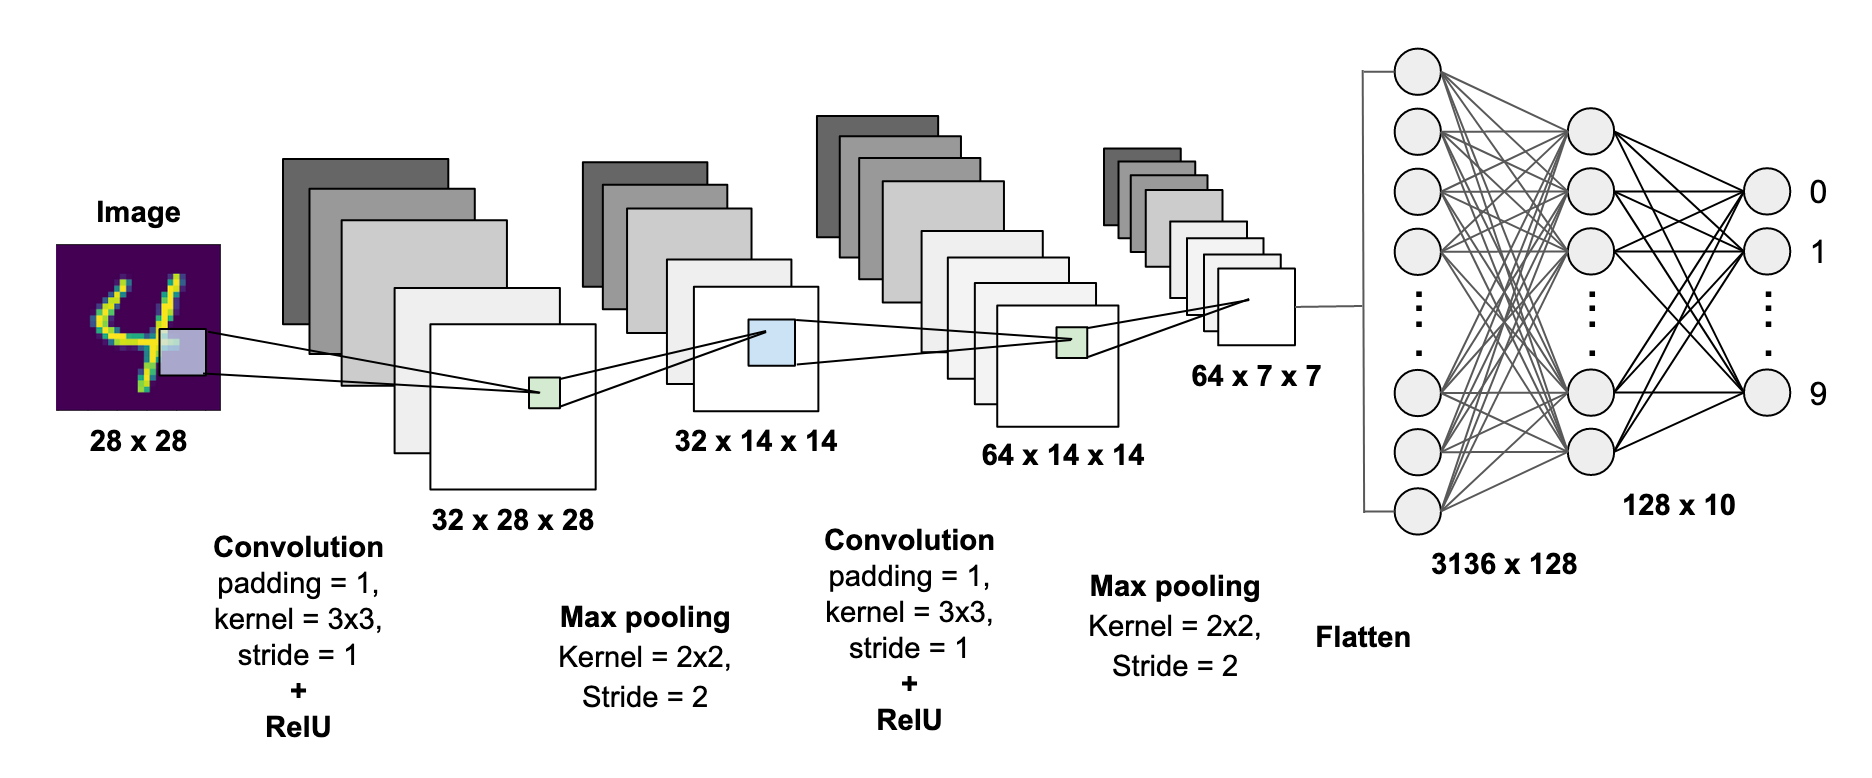

In [9]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

Normaling the data using Image Normalization

In [19]:
X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')
X_sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Choosing the optimizer

The optimizer I am using is the Adam optimizer. The adam optimizer is an efficient optimizer which has good convergence performance on sparse datasets. The learning rate has been set to 0.001 to reduce chances of overshooting the minima. Epsilon is the value used to avoid division by zero by adding it to the denominator. It does not affect the overall convergence, however it should not be too high or it may affect model performance. I have set the decay to zero as I am using the learning rate reduction callback which will affect the learning rate in case a plateau is incurred.

In [25]:
# optimizer = keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-08, decay=0.0)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, epsilon=1e-08)
# optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [26]:
model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

Defining LR callback

In [27]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

Defining a checkpoint callback. This will save a new model everytime the validation accuracy increases, therefore incase the model overfits, we will not lose the best checkpoint.

In [28]:
checkpoint_filepath = './models/cnn_adam_new.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Setting the epochs and the batch size

In [29]:
epochs=30
batch_size = 112

Reshaping the data to make it suitable for model consumption, the format is (batch_idx, width, height, channels)

In [20]:
X_sample_flat = X_sample.values.reshape(-1,28,28,1)
X_sample_test_flat = X_sample_test.values.reshape(-1,28,28,1)
X_train_flat = X_train.values.reshape(-1,28,28,1)
X_test_flat = X_test.values.reshape(-1,28,28,1)

In [21]:
y_sample_flat = tf.keras.utils.to_categorical(y_sample, num_classes=10)
y_sample_test_flat = tf.keras.utils.to_categorical(y_sample_test, num_classes=10)
y_train_flat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_flat = tf.keras.utils.to_categorical(y_test, num_classes=10)

Training the model

In [30]:
hist = model.fit(X_train_flat, y_train_flat, verbose=1, epochs=epochs, batch_size=batch_size, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction, model_checkpoint_callback], validation_data=(X_test_flat, y_test_flat))

Epoch 1/30
300/300 [==============================] - 5s 17ms/step - loss: 0.4186 - accuracy: 0.8658 - val_loss: 0.0838 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 2/30
300/300 [==============================] - 5s 16ms/step - loss: 0.1484 - accuracy: 0.9622 - val_loss: 0.0730 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/30
300/300 [==============================] - 5s 16ms/step - loss: 0.1616 - accuracy: 0.9657 - val_loss: 0.1109 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 4/30
300/300 [==============================] - 5s 16ms/step - loss: 0.2887 - accuracy: 0.9643 - val_loss: 0.1552 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 5/30
300/300 [==============================] - 5s 16ms/step - loss: 0.6835 - accuracy: 0.9635 - val_loss: 1.2990 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 6/30
300/300 [==============================] - ETA: 0s - loss: 2.8397 - accuracy: 0.9619
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
300/300 [==============================] - 5s 16

In [69]:
fit_data = pd.DataFrame(hist.history)
fit_data.to_csv('./logs/cnn_rms_norm_full.csv')
fit_data

,loss,accuracy,val_loss,val_accuracy,lr
0,6.174078,0.737500,0.745773,0.942143,0.001000
1,0.260728,0.946815,0.137355,0.966667,0.001000
2,0.098961,0.971696,0.061371,0.983571,0.001000
3,0.074348,0.979226,0.047404,0.988690,0.001000
4,0.061402,0.982887,0.045964,0.988333,0.001000
5,0.051020,0.985417,0.044346,0.989286,0.001000
6,0.048141,0.986607,0.053793,0.988095,0.001000
7,0.043549,0.988095,0.071282,0.987262,0.001000
8,0.051839,0.987262,0.075743,0.986548,0.001000
9,0.032167,0.991190,0.044287,0.990952,0.000500


Plotting accuracy to loss, the model fits well however it seems to have plateaued on a local minima

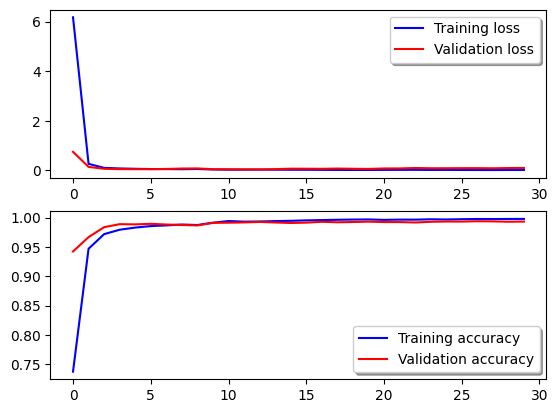

In [54]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Loading the saved model

In [21]:
model = tf.keras.models.load_model('./models/cnn_rms_norm.keras')
model

Generating Classification Report of CNN

In [63]:
pred = model.predict(X_test_flat)
pred = np.argmax(pred, axis=1)

263/263 [==============================] - 1s 3ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       803
           1       1.00      0.99      0.99       929
           2       0.99      0.99      0.99       837
           3       1.00      1.00      1.00       884
           4       1.00      0.99      0.99       836
           5       0.99      0.99      0.99       792
           6       1.00      0.99      0.99       788
           7       0.99      1.00      0.99       901
           8       0.99      0.99      0.99       809
           9       0.99      1.00      0.99       821

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



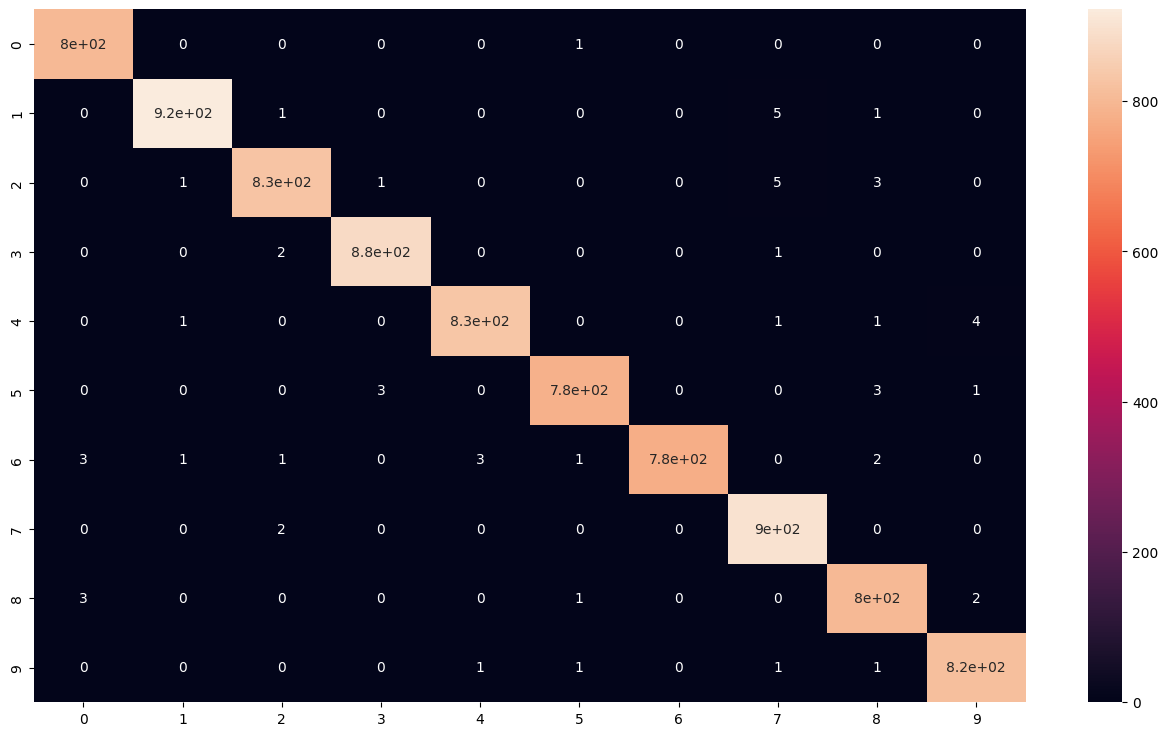

In [68]:
print(classification_report(y_test, pred))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, pred), annot=True)

Training the model on remaining data

In [70]:
hist = model.fit(X_test_flat, y_test_flat, verbose=1, epochs=epochs, batch_size=batch_size, steps_per_epoch=X_test_flat.shape[0] // batch_size, callbacks=[learning_rate_reduction, model_checkpoint_callback], validation_data=(X_test_flat, y_test_flat))

Epoch 1/30
75/75 [==============================] - 2s 24ms/step - loss: 0.0927 - accuracy: 0.9912 - val_loss: 0.0689 - val_accuracy: 0.9940 - lr: 6.2500e-05
Epoch 2/30
75/75 [==============================] - 2s 23ms/step - loss: 0.0764 - accuracy: 0.9925 - val_loss: 0.0563 - val_accuracy: 0.9943 - lr: 6.2500e-05
Epoch 3/30
75/75 [==============================] - 2s 23ms/step - loss: 0.0726 - accuracy: 0.9912 - val_loss: 0.0481 - val_accuracy: 0.9949 - lr: 6.2500e-05
Epoch 4/30
75/75 [==============================] - 2s 24ms/step - loss: 0.0656 - accuracy: 0.9918 - val_loss: 0.0418 - val_accuracy: 0.9948 - lr: 6.2500e-05
Epoch 5/30
75/75 [==============================] - 2s 24ms/step - loss: 0.0576 - accuracy: 0.9908 - val_loss: 0.0360 - val_accuracy: 0.9954 - lr: 6.2500e-05
Epoch 6/30
75/75 [==============================] - 2s 23ms/step - loss: 0.0613 - accuracy: 0.9918 - val_loss: 0.0302 - val_accuracy: 0.9955 - lr: 6.2500e-05
Epoch 7/30
75/75 [==============================] - 

### Observation Vanilla CNN

CNN are most suited for a task such as Handwritten Digit Reconition due to its ability of automated feature extraction which efficiently combats the high dimensionality and sparsity present within the dataset. CNN achieves a near state of the art accuracy of 99.7% due to its ability of feature extraction and non linear function approximation. This is one of the best performing implementations for this dataset.

Making A Kaggle Submission with the Vanilla model

In [75]:
fin_test = pd.read_csv('./data/test.csv')
fin_test = fin_test / 255.0
fin_test_flat = fin_test.values.reshape(-1,28,28,1)
y_sub = model.predict(fin_test_flat)

875/875 [==============================] - 3s 3ms/step


In [76]:
y_sub = np.argmax(y_sub, axis=1)

In [77]:
sub_id = np.arange(1, len(fin_test)+1)
sub_csv = pd.DataFrame({'ImageId':sub_id, 'Label':y_sub})
sub_csv.reset_index(drop=True)
sub_csv.to_csv('./cnn_rms_full.csv', index=False)

Making the Final Summary

In [26]:
def get_scores(model, norm):
    if norm == 'min_max':
        X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('min_max')
    elif norm == 'standard':
        X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('standard')
    else:
        X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')
    
    acc = model.score(X_test, y_test)
    
    return acc

logistic_score = get_scores(logistic_final, 'standard')
knn_score = get_scores(knn_final, 'img_norm')
dtc_score = get_scores(dtc_final, 'img_norm')
svm_score = get_scores(svc_final, 'img_norm')

In [28]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test, X_sample, X_sample_test, y_sample, y_sample_test = normalize('img_norm')
X_test_flat = X_test.values.reshape(-1,28,28,1)

pred = model.predict(X_test_flat)
pred = np.argmax(pred, axis=1)

cnn_score = accuracy_score(y_test, pred)

263/263 [==============================] - 1s 3ms/step


In [100]:
score_csv = pd.DataFrame({'Model':['Logistic Regression', 'K-Nearest Neigbours', 'Decision Tree Classifier', 'Support Vector Machine', 'CNN'], 'Scores':[logistic_score, knn_score, dtc_score, svm_score, cnn_score]})
score_csv.to_csv('./final_results.csv')

In [107]:
score_csv = pd.read_csv('./final_results.csv')
score_csv

,Unnamed: 0,Model,Scores
0,0,Logistic Regression,0.919286
1,1,K-Nearest Neigbours,0.970238
2,2,Decision Tree Classifier,0.862976
3,3,Support Vector Machine,0.980714
4,4,CNN,0.997524


## Final Summary

| Algorithm                    | Accuracy  | Train Time | Normalizer |
|------------------------------|-----------|------------|------------|
| Logistic Regression          | 91.92%    | 23.8s      | Standard   |
| K-Nearest Neighbours         | 97.02%    | 0.03s      | Img Norm   |
| Decision Tree Classifier     | 86.21%    | 3.0s       | Img Norm   |
| Support Vector Machine       | 98.07%    | 57.3s      | Img Norm   |
| Convolutional Neural Network | 99.77%    | 155s       | Img Norm   |

<Axes: xlabel='Scores', ylabel='Model'>

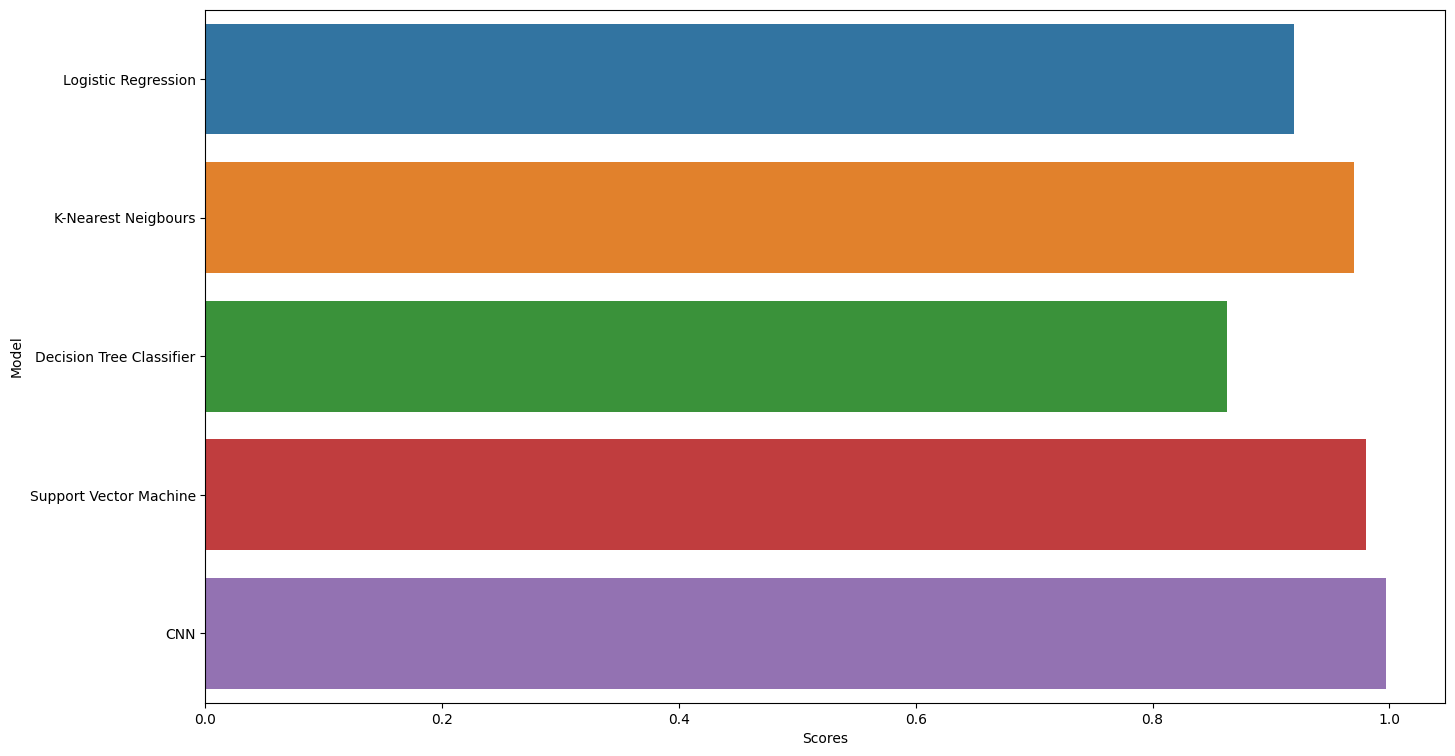

In [108]:
plt.figure(figsize=(16,9))
sns.barplot(score_csv, x='Scores', y='Model', hue='Model')

<Axes: xlabel='Model', ylabel='Scores'>

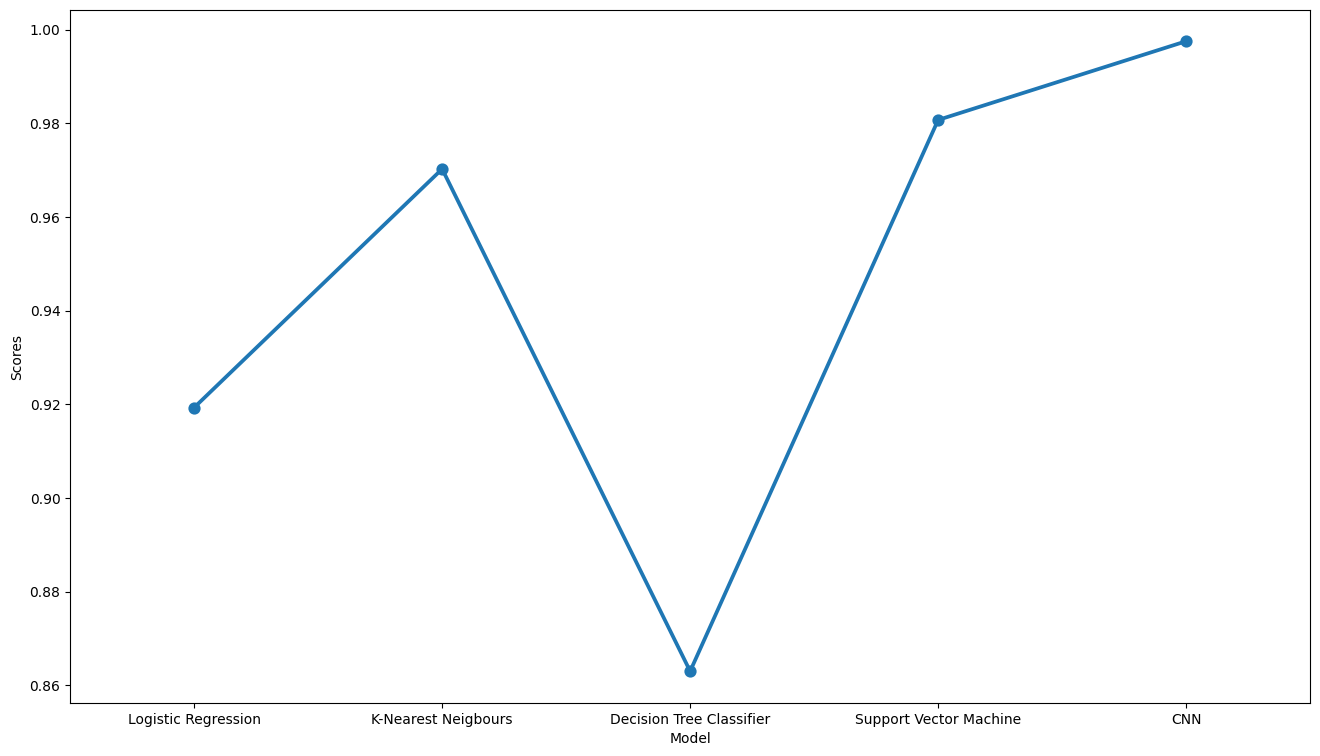

In [127]:
plt.figure(figsize=(16,9))
sns.pointplot(score_csv, x='Model', y='Scores')


## Notable Inferences

| Algorithm                    | Observation  |
|------------------------------|--------------|
| Logistic Regression          |Logistic Regression plateaus around 92% accuracy as it does not have the parameter complexity to account for the whole dataset. Whilst Logistic Regression with its **One vs Rest** strategy may be able to classify unique entries, it will often times struggle in confidently predicting the digits which have many similar features for eg: 0, 8, 9 all have similar curves and holes leading to model confusion and poor predictions. | The KNN algorithm is a distance based algorithm which estimates the data label based on its N nearest neighbours. Since the MNIST dataset has many entries with features that generally represent a particular label, there is a high probability that an unknown entry may have features similar to its label and may get placed among its neighbours of the same class. This gives excellent accuracy on the absolute points, however KNN fails to correctly classify those points which are anomalies and may not represent the general features of the particular label. |
| Decision Tree Classifier     | The Decision Tree Classifier yields a flow chart like tree which produces predictions based on conditional nodes and branches of the trees leading to a leaf node. The sparsity of the dataset as well as the feature similarites shared across labels means that the decision tree will not be able to produce pure splits with a zero entropy. This yields a poorly classifying model incapable of confidently predicting the correct label. The performance can be increased by performing t-SNE or TSVD where only the most important features representing each label are kept. This will reduce the ambiguity within the dataset and allow a generelized tree to be developed. |
| Support Vector Machine       | The SVM algorithm provides a highly desireable accuracy of 98%. This is due to its complexity and the ability to split complex data into labels using hyperplanes. The SVM algorithm represents the datset into a multi-dimensional space and uses hyperplanes which a seperating planes that can exhibit a functional shape useful for splitting the data into respective labels. The hyperplane is formed on the basis of the support vectors which are basically points that share similar features to multiple labels due to which the datapoint is difficult to classify. By applying the principle of maximizing the support vector distance, optimum planes are found for accurate classification of the dataset. |
| Convolutional Neural Network | CNN are most suited for a task such as Handwritten Digit Reconition due to its ability of automated feature extraction which efficiently combats the high dimensionality and sparsity present within the dataset. CNN achieves a near state of the art accuracy of 99.7% due to its ability of feature extraction and non linear function approximation. This is one of the best performing implementations for this dataset. |